In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
from textblob import TextBlob
from datetime import datetime
import os
from numpy import nan
import seaborn as sns
from sklearn import feature_selection
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import feature_selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
import random
from sklearn.model_selection import StratifiedShuffleSplit
import statsmodels.api as sm
from sklearn import svm
import scikitplot as skplt
import warnings
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
#sns.set_style("whitegrid")

E:\ProgramData\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
E:\ProgramData\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\ProgramData\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Motivation

Recent reports in media about closing dark markets (including the largest one, AlphaBay) offering drugs, weapon and other illegal stuff

not only suicide of AlphaBay owner, but high prison sentences for vendors (https://www.deepdotweb.com/2018/06/04/alphabay-fraud-vendor-sentenced-to-a-decade-in-prison/)

Many cases of sellers being busted (https://www.deepdotweb.com/tag/busted/)

known statistics includes 113 sellers busted within 2011 - 2015 period, but many cases still remains unknown (https://www.gwern.net/DNM-arrests)

Anonimous vendors - relatively easy to ‘close’ business without sending items or use other possibilities to cheat buyers



Data sources:

DARKNET MARKET ARCHIVES (2013-2015) (https://www.gwern.net) - DreamMarket archive pages from 01-07/2015 in .html format


Own scrapping of DreamMarket (the biggest market available in archives that is still open)




In [3]:
# read data after cleaning part
dmg = pd.read_csv('beforeFS')

In [4]:
# binarize variable in the way that it is either 1 categorie or more
print(dmg['rangeOfCategories'].value_counts())
dmg['rangeOfCategories'] = (dmg['rangeOfCategories'] == 1).astype(int)

1    238
2     45
3     24
4      7
5      6
8      1
7      1
6      1
Name: rangeOfCategories, dtype: int64


In [5]:
# binarize variable in the way that it is either 1 categorie or more
print(dmg['rangeOfSubCategories'].value_counts())
dmg['rangeOfSubCategories'] = (dmg['rangeOfSubCategories'] == 1).astype(int)

1    167
2     71
3     34
4     27
5     16
6      5
7      2
9      1
Name: rangeOfSubCategories, dtype: int64


In [6]:
# binarize variable in the way that it is either 1 categorie or more
print(dmg['uniqueAuctions'].value_counts())
dmg['uniqueAuctions'] = (dmg['uniqueAuctions'] == 1).astype(int)

1    229
2     50
3     26
4      9
5      6
7      2
9      1
Name: uniqueAuctions, dtype: int64


In [5]:
for i in range(1, 233, 10):
    print(i)

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231


In [7]:
# divide columns into categories - binary and numeric
cls = 'active2Years'
numeric = ['offersCount',
 'titlesMeanLen',
 'prodDescMeanLen',
 'termsMeanLen',
 'lastStatus',
 'prodDescSentimentMean',
 'termsSentimentMean']

binary = ['shipToUSA',
 'shipToAustralia',
 'shipToEU',
 'shipToCanada',
 'shipWorldwide',
 'USA',
 'UK',
 'Europe',
 'World',
 'Netherlands',
 'Australia',
 'Digital',
 'Germany',
 'isCat_Drugs',
 'isCat_Digital_goods',
 'isCat_others',
 'isSubCat_Psychedelics',
 'isSubCat_Cannabis',
 'isSubCat_Opioids',
 'isSubCat_Ecstasy',
 'isSubCat_Stimulants',
 'isSubCat_Prescriptions',
 'isSubCat_others',
 'rangeOfCategories',
 'rangeOfSubCategories',
 'uniqueAuctions']
features = binary + numeric

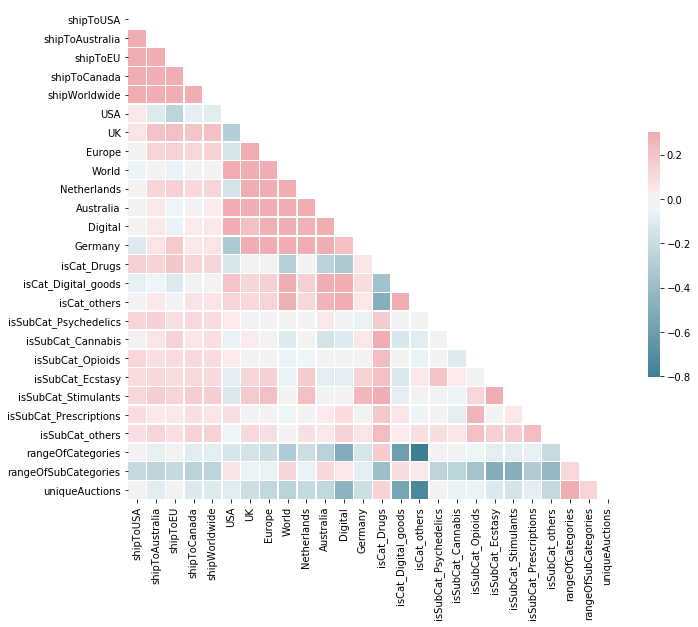

In [8]:
# Compute the correlation matrix
corr = dmg[binary].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
a = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
# split into train and test 
dmgSample = dmg.sample(frac = 0.8)
dmgTrain = dmg[dmg.index.isin(dmgSample.index)]
dmgTest = dmg[~dmg.index.isin(dmgTrain.index)]

E:\ProgramData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\ProgramData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\ProgramData\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


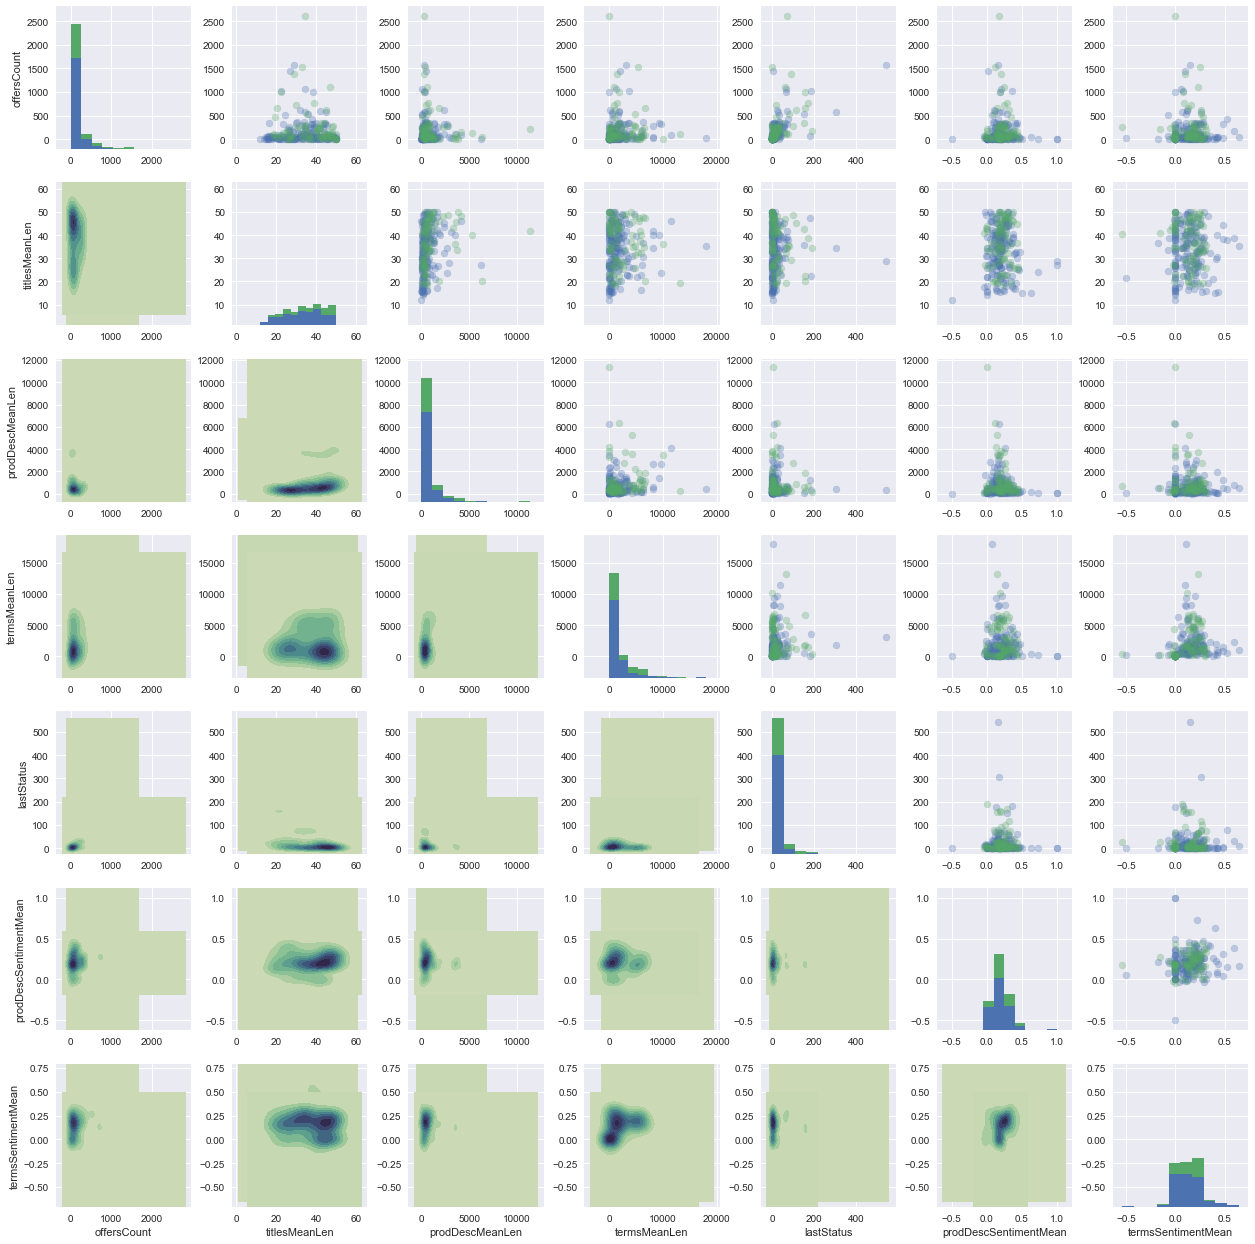

In [10]:
# prepare dataset for plotting (class variable cannot be integer type)
dmgTrain_ = dmgTrain[numeric + ['active2Years']]
dmgTrain_['active2Years'] = dmgTrain_.active2Years.astype(str)
d = {'1': 'stillThere', '0': 'missing'}
dmgTrain_['active2Years'] = dmgTrain_['active2Years'].map(d)
sns.set()
g = sns.PairGrid(dmgTrain_, hue = 'active2Years')
#g = g.map_upper(sns.regplot, ci = None, scatter_kws={'alpha': 0.3, 'color': '#405940'}, line_kws={"color": '#34495e'})
g = g.map_upper(plt.scatter, alpha = 0.3)
cmap = sns.cubehelix_palette(start = .5, rot = -.75, as_cmap = True)
g = g.map_lower(sns.kdeplot, cmap = cmap, shade = True)
g = g.map_diag(plt.hist)

In [11]:
# standarize numeric columns
dmgTrain[numeric] = dmgTrain[numeric].apply(lambda x: (x-x.mean())/x.std())
dmgTest[numeric] = dmgTest[numeric].apply(lambda x: (x-x.mean())/x.std())

E:\ProgramData\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [12]:
def makeClassif(skf, clf, features, classVar, df, printEachIter):
    aucs, aucsT, probsList = [], [], []
    for train, test in skf.split(df[features].values, df[classVar].values):
        res = clf.fit(df.iloc[train][features].values, df.iloc[train][classVar].values)
        predsTrain = res.predict_proba(df.iloc[train][features])
        preds = res.predict_proba(df.iloc[test][features])
        if printEachIter:
            print("Train AUC:", roc_auc_score(df.iloc[train][classVar], predsTrain[:,1]), "Valid AUC:", roc_auc_score(df.iloc[test][classVar], preds[:,1]))
        aucs.append(roc_auc_score(df.iloc[test][classVar], preds[:,1]))
        aucsT.append(roc_auc_score(df.iloc[train][classVar], predsTrain[:,1]))
    #print('Overall:', np.mean(aucsT), np.mean(aucs))
    #print(res.coef_, res.intercept_)
    return [np.mean(aucsT), np.mean(aucs)]

def makeClassifFE(skf, clf, features, classVar, df, printEachIter):
    aucs, aucsT, probsList = [], [], []
    for train, test in skf.split(df[features].values, df[classVar].values):
        dfTrain, S, toEval = makeFEMI(O = features, df = df.iloc[train])
        df_FE = df.iloc[test].copy()
        for i in toEval:
            df_FE[i[0]] = eval(i[1])
        res = clf.fit(dfTrain[S].values, dfTrain[classVar].values)
        predsTrain = res.predict_proba(dfTrain[S])
        preds = res.predict_proba(df_FE[S])
        if printEachIter:
            print("Train AUC:", roc_auc_score(dfTrain[classVar], predsTrain[:,1]), "Valid AUC:", roc_auc_score(df_FE[classVar], preds[:,1]))
        aucs.append(roc_auc_score(df_FE[classVar], preds[:,1]))
        aucsT.append(roc_auc_score(dfTrain[classVar], predsTrain[:,1]))
    #print('Overall:', np.mean(aucsT), np.mean(aucs))
    #print(res.coef_, res.intercept_)
    return [np.mean(aucsT), np.mean(aucs)]

def makeKnn(n_splits, features, n_neighbors, classVar = 'active2Years', df = dmgTrain, printEachIter = False, FE = False):
    skf = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = random.randint(0, 10000))
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    if FE:
        return makeClassifFE(skf, clf, features, classVar, df, printEachIter)
    else:
        return makeClassif(skf, clf, features, classVar, df, printEachIter)


def makeLogit(n_splits, features, penalty = 'l2', C = 1e9, classVar = 'active2Years', df = dmgTrain, printEachIter = False, FE= False):
    skf = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = random.randint(0, 10000))
    clf = LogisticRegression(penalty = penalty, C = C)
    if FE:
        return makeClassifFE(skf, clf, features, classVar, df, printEachIter)
    else:
        return makeClassif(skf, clf, features, classVar, df, printEachIter)

def makeSvm(n_splits, features, kernel, classVar = 'active2Years', df = dmgTrain, printEachIter = False, FE = False):
    skf = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = random.randint(0, 10000))
    clf = svm.SVC(probability = True, kernel = kernel)
    if FE:
        return makeClassifFE(skf, clf, features, classVar, df, printEachIter)
    else:
        return makeClassif(skf, clf, features, classVar, df, printEachIter)

Start with basic logistic regression with default settings

In [15]:
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
makeLogit(5, features)

[0.81076981810015725, 0.65419419419419422]

In [475]:
# result: highly overfitted 

Features Selection Part using ReliefF algorithm

In [16]:
from skrebate import ReliefF
rel = ReliefF(n_features_to_select = len(features), discrete_threshold = 10, verbose = True, n_jobs = -1)
X = dmgTrain[features].values
y = dmgTrain[cls].values
f = rel.fit(X, y)
featuresRank = np.array(features)[f.top_features_]

Created distance array in 0.003977775573730469 seconds.
Feature scoring under way ...
Completed scoring in 0.9490861892700195 seconds.


In [17]:
best = []
bestAuc = 0
obs = []
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
# using ranking after JMI feature selection method
r = np.arange(0.1, 5, 0.1)
#r = np.append(r, [100, 200, 300, 400, 500, 1e9])
for regulType in ['l1', 'l2']:
    for regul in r:
        feats, aucTrain, aucTest = [], [], []
        for i, feat in enumerate(featuresRank):
            train, test = makeLogit(5, featuresRank[0:i + 1], regulType, regul, df = dmgTrain)
            # plot only those that are not massively overfitted / underfitted
            #if abs(test - train) < 0.05:
            obs.append([test, i + 1, regul, regulType, (train - test)*100])
            if test > bestAuc:
                if abs(test - train) < 0.01:
                    best = []
                    bestAuc = test
                    best.append([i + 1, regul, regulType, train, test]) 

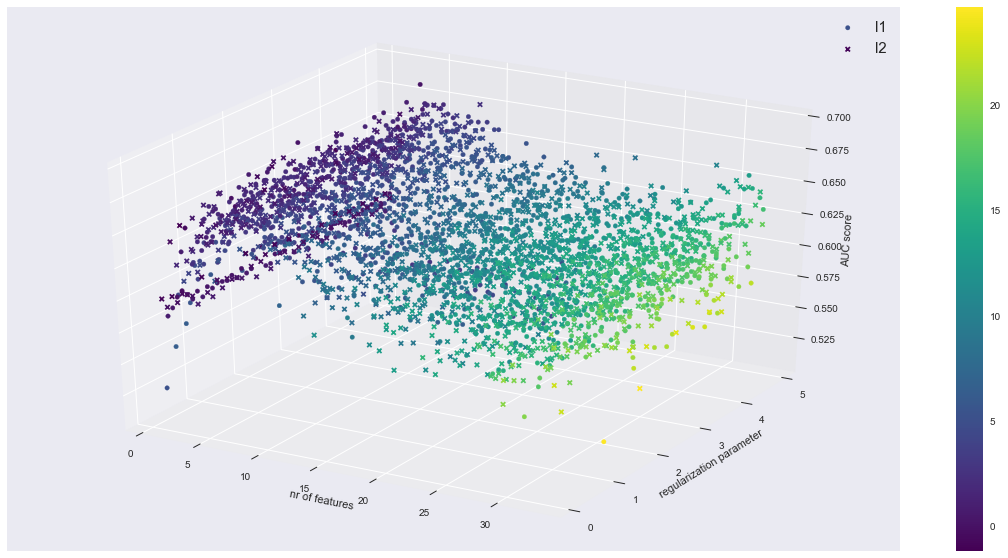

In [18]:
from mpl_toolkits.mplot3d import Axes3D
df = pd.DataFrame(obs, columns = ['aucScore', 'nrOfFeats', 'regularization', 'regularizationType', 'train-test'])
markers = {'l1': 'o', 'l2': 'x'}
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for type_ in df['regularizationType'].unique():
    surf = ax.scatter(df[df['regularizationType'] == type_]['nrOfFeats'],\
                     df[df['regularizationType'] == type_]['regularization'], \
                     df[df['regularizationType'] == type_]['aucScore'], \
                     c = df[df['regularizationType'] == type_]['train-test'], \
                     marker = markers[type_], cmap='viridis', alpha = 1)
plt.colorbar(surf)
lgnd = plt.legend(['l1', 'l2'], prop={'size': 15})
plt.xlabel('nr of features')
plt.ylabel('regularization parameter')
ax.set_zlabel('AUC score')
plt.show()

In [19]:
best = [str(x) for x in best[0]]
('the best model has {0} features, regularization parameter equals to {1} and is regularization type {2}. Test AUC score = {3}'.format(*best))

'the best model has 5 features, regularization parameter equals to 4.6 and is regularization type l1. Test AUC score = 0.688472872479'

In [20]:
# make grid search on linear and rbf kernels
clf = svm.SVC()
params = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                      'C': [0.5, 1, 5, 10, 100, 1000, 10000]},
                     {'kernel': ['linear'], 'C': [0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]}]
for param in params:
    X, y = dmgTrain[features].values, dmgTrain[cls].values
    gs = GridSearchCV(clf, param, scoring = 'roc_auc')
    gs.fit(X, y)

print(gs.best_score_)
print(gs.best_params_ )

0.5892569022877829
{'C': 100, 'kernel': 'linear'}


Try Features Extracion with LDA

Based on svm results, i can assume that data is rather lineary separable, than non - lineary.
That is why i implemented Features Extraction with linear LDA just to see if it can result in better separation.

In [21]:
def makeScatter(var1, var2, df, y):
    for lab, col in zip(range(0, 3), ['blue', 'green', 'red']):
        plt.scatter(df[df[y] == lab][var1], df[df[y] == lab][var2], facecolor=col, alpha=0.5)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()
    
def makeScatterVar(var, varianceExp):
    for lab, col in zip(range(0, 3), ['blue', 'green', 'red']):
        plt.scatter(var[y == lab, 0], var[y == lab, 1], facecolor=col, alpha=0.5)
    plt.xlabel('comp1' + '\n' + str(round(100 - varianceExp * 100, 2)) + '%')
    plt.ylabel('comp2' + '\n' + str(round(varianceExp * 100, 2)) + '%')
    plt.show()
    
def Npe(col1, col2, df, y):
    X = df[[col1, col2]].values
    y = df[y].values
    S_W, S_B = scatter_within(X, y), scatter_between(X, y)
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
    W = get_components(eig_vals, eig_vecs, len(X[0]), n_comp=2)
    eig_vals = sorted(eig_vals, reverse = True)
    for i in range(len(eig_vals)):
        eigvec_sc = eig_vecs[:,i].reshape(2,1)   
        #print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    X_lda = X.dot(W)
    return [eig_vals[1] / sum(eig_vals), X_lda]

import scipy
def Red(col1, col2, df):
    col1 = df[col1].values
    col2 = df[col2].values
    return scipy.stats.pearsonr(col1, col2)[0]

def findRFeat(col1, col2):
    col1 = df[col1].values
    col2 = df[col2].values
    if abs(scipy.stats.pearsonr(col1, y)[0]) > abs(scipy.stats.pearsonr(col2, y)[0]):
        rFeat = col1
        weakFeat = col2
    else:
        rFeat = col2
        weakFeat = col1
    return [rFeat, weakFeat]

In [22]:
#lda implementation
# http://sebastianraschka.com/Articles/2014_python_lda.html#step-4-selecting-linear-discriminants-for-the-new-feature-subspace
import numpy as np

def comp_mean_vectors(X, y):
    class_labels = np.unique(y)
    n_classes = class_labels.shape[0]
    mean_vectors = []
    for cl in class_labels:
        mean_vectors.append(np.mean(X[y==cl], axis=0))
    return mean_vectors

def scatter_within(X, y):
    class_labels = np.unique(y)
    n_classes = class_labels.shape[0]
    n_features = X.shape[1]
    mean_vectors = comp_mean_vectors(X, y)
    S_W = np.zeros((n_features, n_features))
    for cl, mv in zip(class_labels, mean_vectors):
        class_sc_mat = np.zeros((n_features, n_features))            
        for row in X[y == cl]:
            row, mv = row.reshape(n_features, 1), mv.reshape(n_features, 1)
            class_sc_mat += (row-mv).dot((row-mv).T)
        S_W += class_sc_mat                           
    return S_W

def scatter_between(X, y):
    overall_mean = np.mean(X, axis=0)
    n_features = X.shape[1]
    mean_vectors = comp_mean_vectors(X, y)    
    S_B = np.zeros((n_features, n_features))
    for i, mean_vec in enumerate(mean_vectors):  
        n = X[y==i+1,:].shape[0]
        mean_vec = mean_vec.reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    return S_B

def get_components(eig_vals, eig_vecs, nrow, n_comp=2):
    n_features = X.shape[1]
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    W = np.hstack([eig_pairs[i][1].reshape(nrow, 1) for i in range(0, n_comp)])
    return W

def computeMi(i, j, b, n, df):
    # let sklearn assign whether i is discrete or continous
    if j in b:
        mi = mutual_info_classif(df[i].values.reshape(-1, 1), df[j])
    else:
        mi = mutual_info_regression(df[i].values.reshape(-1, 1), df[j])
    return mi

In [24]:
#features2 = ['fold', 'PctHousOccup', 'HousVacant', 'PctHousLess3BR', 'PctPersDenseHous', 'PctPersOwnOccup', 'PersPerRentOccHous', 'PersPerOwnOccHous', 'PersPerOccupHous', 'PctLargHouseOccup', 'PctLargHouseFam', 'PctNotSpeakEnglWell', 'LemasPctOfficDrugUn', 'PctRecImmig10', 'PctRecImmig8', 'PctRecImmig5', 'PctRecentImmig', 'PctImmigRec10', 'PctImmigRec8', 'PctImmigRec5', 'PctImmigRecent', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctUsePubTrans', 'PopDens', 'LandArea', 'PctSameState85', 'PctSameCity85', 'PctSameHouse85', 'PctBornSameState', 'PctForeignBorn', 'NumStreet', 'NumInShelters', 'NumImmig', 'MedOwnCostPctIncNoMtg', 'MedRentPctHousInc', 'MedRent', 'RentHighQ', 'RentMedian', 'RentLowQ', 'OwnOccHiQuart', 'OwnOccMedVal', 'OwnOccLowQuart', 'PctWOFullPlumb', 'PctHousNoPhone', 'MedOwnCostPctInc', 'PctIlleg', 'PctSpeakEnglOnly', 'PctWorkMom', 'whitePerCap', 'perCapInc', 'medFamInc', 'pctWRetire', 'pctWPubAsst', 'pctWSocSec', 'pctWInvInc', 'pctWFarmSelf', 'NumIlleg', 'medIncome', 'blackPerCap', 'pctUrban', 'agePct65up', 'agePct16t24', 'agePct12t29', 'agePct12t21', 'householdsize', 'population', 'numbUrban', 'indianPerCap', 'pctWWage', 'FemalePctDiv', 'PctTeen2Par', 'PctKids2Par', 'PctFam2Par', 'PersPerFam', 'TotalPctDiv', 'PctYoungKids2Par', 'MalePctNevMarr', 'MalePctDivorce', 'PctOccupMgmtProf', 'PctWorkMomYoungKids', 'PctOccupManu', 'PctEmplManu', 'PctEmploy', 'PctUnemployed', 'PctBSorMore', 'PctNotHSGrad', 'PctLess9thGrade', 'PctPopUnderPov', 'NumUnderPov', 'HispPerCap', 'PctEmplProfServ', 'AsianPerCap']
#features2 = ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
features2 = numeric + binary
# Treasholds
T1 = 0.0025
T2 = 0.9
# O -> original features set
O = list(features2)
def makeFEMI(O = O, T1 = T1, T2 = T2, df = dmgTrain, b = binary, n = numeric):
    O = list(O)
    df = df.copy()
    for col in O:
        if df[col].dtype != 'float64':
            df[col] = df[col].astype(float)
    # S -> set of semi features
    S, toEval = [], []
    flag = True
    k = 1
    while(flag == True):
        Dim = list(O + S)
        for i in list(O + S):
            if i not in O and i not in S:
                continue
            for j in list(O + S):
                if j not in O and j not in S:
                    continue
                if i == j:
                    continue
                mi = computeMi(i, j, b, n, df)
                if mi[0] > 0.2: # Npe lower that specified treshold
                    var, comps = Npe(i, j, df, y = 'active2Years')
                    #print('var = ', var, 'below treshold for', i, j)
                    name = 's' + str(k)
                    df[name] = comps[:, 0].astype(float) # first eigen components of i and j
                    toEval.append([name, '(df_FE["' + i +'"] * ' + str(comps[:, 0][0]) + ') + '\
                                  + '(df_FE["' + j + '"] * ' + str(comps[:, 0][1]) + ')'])
                    S.append(name) # add first eigen comp of i and j to set of semi features
                    #makeScatter(i, j, df, y = 'active2Years')
                    #makeScatterVar(comps, var)
                    k += 1
                    if i in O:
                        O.remove(i)
                    if j in O:
                        # remove i and j from original features set
                        O.remove(j)
                    if j in S:
                        S.remove(j)
                    if i in S:
                        S.remove(i)
                    break
#         print('********************************************************************************************************************************************')
#         print('after first stage, O:', O, len(O), 'and S', S)
#         print('********************************************************************************************************************************************')
#         for i in O + S:
#             for j in O + S:
#                 if i == j:
#                     continue
#                 if Red(i, j, df) > T2:
#                     rFeat, weakFeat = findRFeat(i, j)
#                     if weakFeat in O:
#                         O.remove(weakFeat)
#                     elif weakFeat in S:
#                         S.remove(weakFeat)
        if len(Dim) == len(O + S):
            flag = False # end when none of the features fulfilled ifs statements
        else:
            flag = True
    return [df.copy(), O + S, toEval]

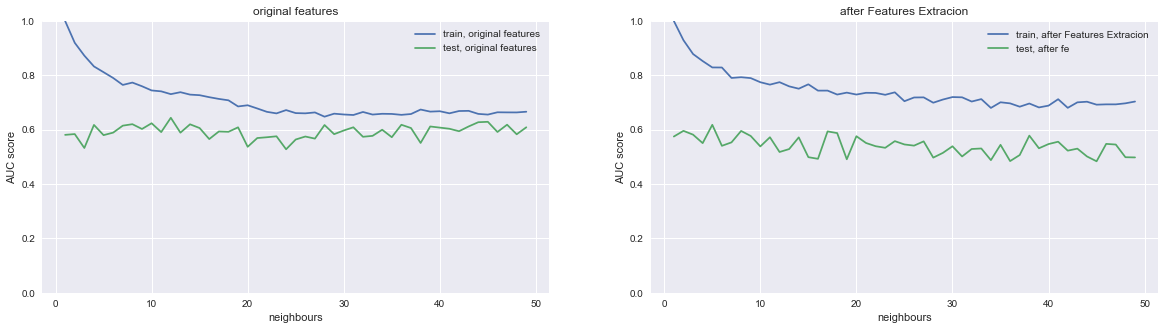

In [25]:
warnings.filterwarnings("ignore")  # ignore warnings about conversion of int to float
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
for FE, ax, leg in zip([False, True], axes.flat, [['train, original features', 'test, original features'], ['train, after Features Extracion', 'test, after fe']]):
    neighbours, aucTrain, aucTest = [], [], []
    for neighs in range(1, 50):
        train, test = makeKnn(5, binary + numeric, neighs, df = dmgTrain, FE = FE)
        neighbours.append(neighs)
        aucTrain.append(train)
        aucTest.append(test)
    ax.plot(neighbours, aucTrain)
    ax.set_xlabel('neighbours')
    ax.set_ylabel('AUC score')
    ax.set_title(leg[0].split(', ')[1])
    ax.plot(neighbours, aucTest)
    ax.set_ylim(0, 1)
    ax.legend(leg)
plt.show()
warnings.filterwarnings("default")

In [26]:
best

['5', '4.6', 'l1', '0.688472872479', '0.691681681682']

In [44]:
# try to make logit after features extraction with best settings
features = binary + numeric
makeLogit(5, featuresRank[0:int(best[0])], best[2], float(best[1]), df = dmgTrain, FE = True)

[0.6925211313049966, 0.60252252252252259]

In [49]:
# use beset settings to make predictions
clf = LogisticRegression(penalty = best[2], C = float(best[1]))
clf.fit(dmgTrain[featuresRank[0:int(best[0])]].values, dmgTrain['active2Years'].values)
probs = clf.predict_proba(dmgTest[featuresRank[0:int(best[0])]])
score = roc_auc_score(dmgTest['active2Years'], probs[:, 1])
print('final result:', score)

final result: 0.677696078431


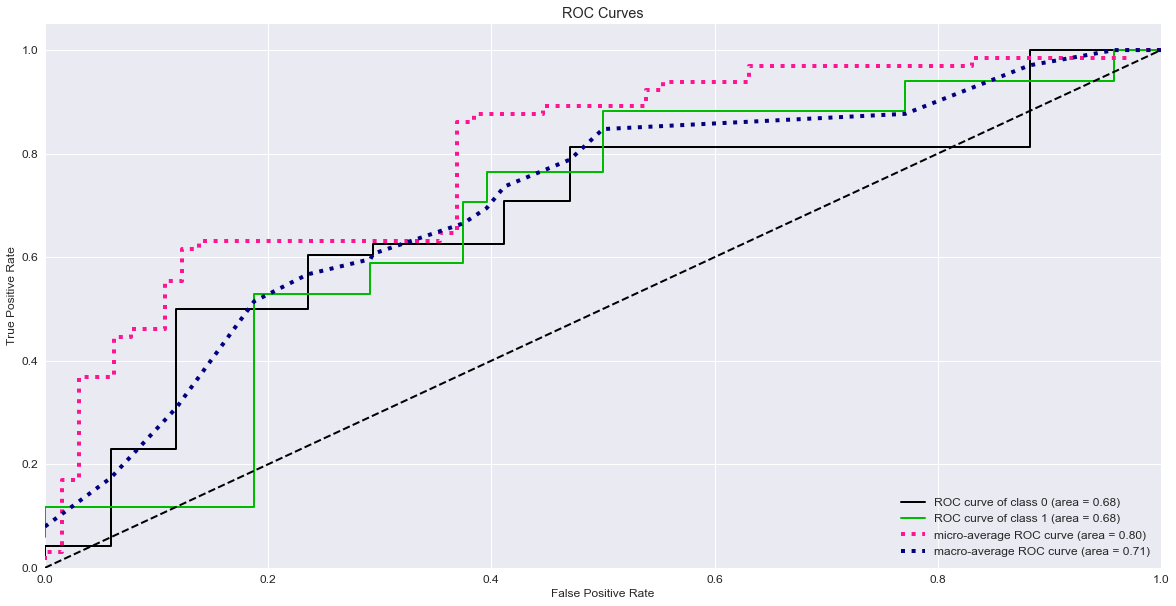

In [50]:
skplt.metrics.plot_roc(dmgTest['active2Years'].values,  probs)